In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [3]:
loan = pd.read_csv('train_ctrUa4k.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


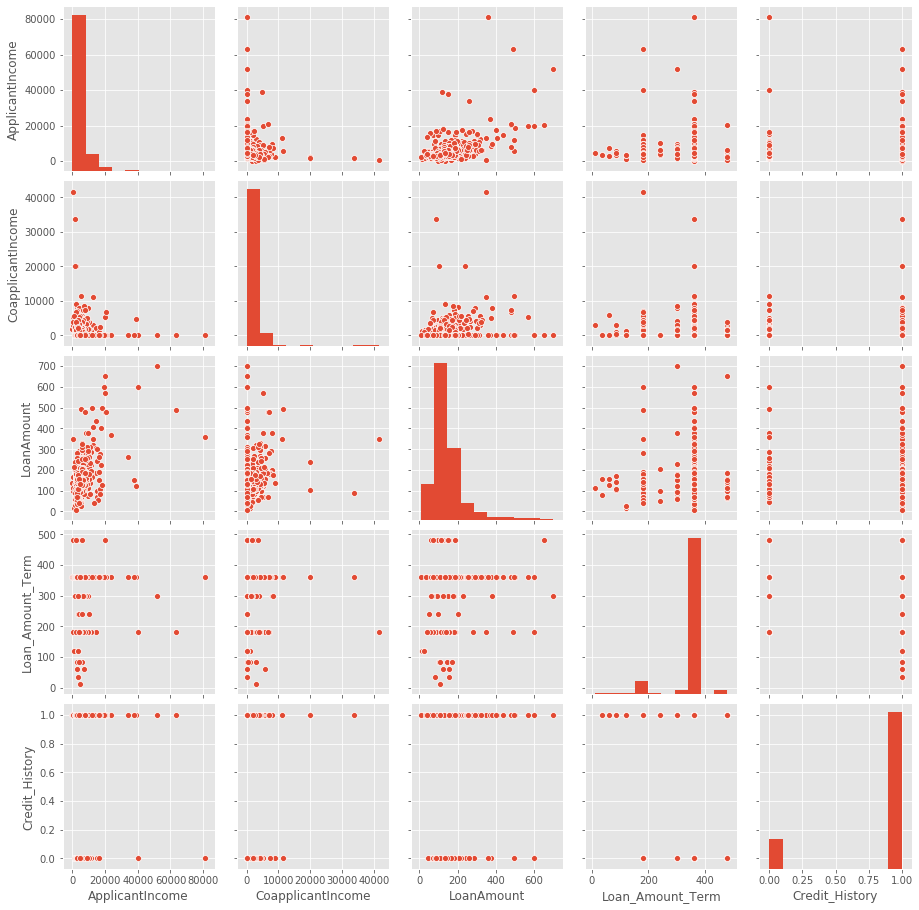

In [5]:
sns.pairplot(loan)

In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

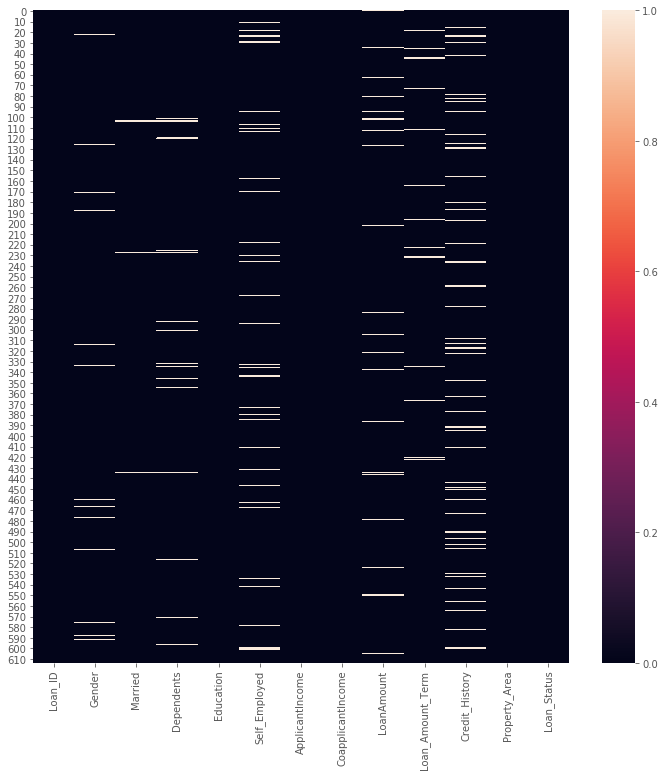

In [7]:
plt.figure(figsize=(12,12))

sns.heatmap(loan.isnull())

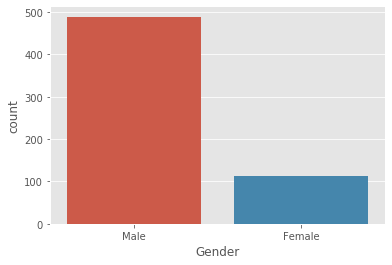

In [8]:
sns.countplot(x='Gender',data=loan)

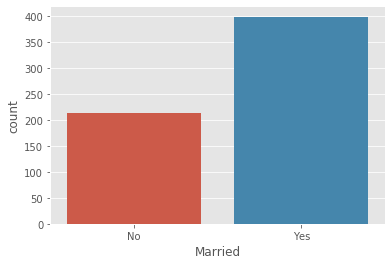

In [9]:
sns.countplot(x='Married',data=loan)

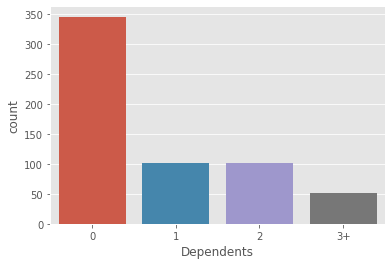

In [11]:
sns.countplot(x='Dependents',data=loan)


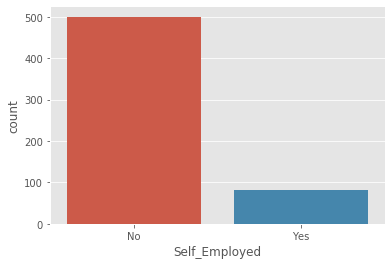

In [12]:
sns.countplot(x='Self_Employed',data=loan)

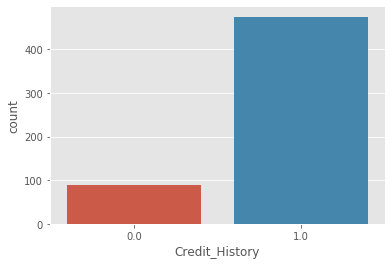

In [14]:
sns.countplot(x='Credit_History',data=loan)

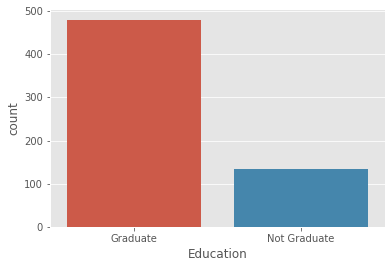

In [15]:
sns.countplot(x='Education',data=loan)

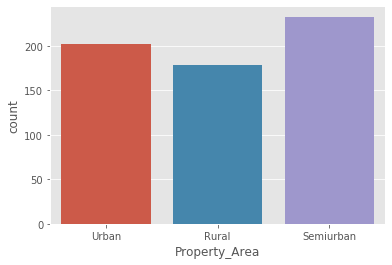

In [16]:
sns.countplot(x='Property_Area',data=loan)

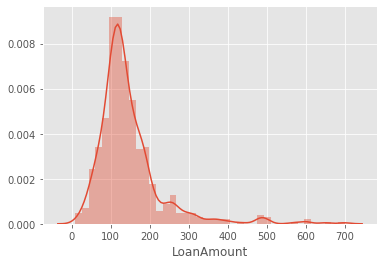

In [17]:
sns.distplot(loan['LoanAmount'],bins=40)

In [18]:
loan[loan['LoanAmount']<350].count()

Loan_ID              572
Gender               561
Married              570
Dependents           559
Education            572
Self_Employed        544
ApplicantIncome      572
CoapplicantIncome    572
LoanAmount           572
Loan_Amount_Term     558
Credit_History       526
Property_Area        572
Loan_Status          572
dtype: int64

In [19]:
loan = loan[loan['LoanAmount']<350]

In [22]:
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

In [23]:
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)

In [25]:
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)

In [26]:
loan = loan.drop(columns=['Loan_ID'])
loan_encoded = pd.get_dummies(loan,drop_first=True)
loan_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [27]:
test = pd.read_csv('test.csv')

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [29]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [30]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [31]:
test = test.drop(columns=['Loan_ID'])
test_encoded = pd.get_dummies(test,drop_first=True)
test_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [32]:
x_train=loan_encoded.drop(columns=['Loan_Status_Y'])
y_train=loan_encoded['Loan_Status_Y']

In [34]:
x_test = test_encoded

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_train)

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
accuracies.mean()


0.8182093163944343

In [40]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [50,60,65,70,75]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [41]:
best_accuracy

0.8182093163944343

In [42]:
y_pred1= classifier.predict(x_test)

In [43]:
from numpy import savetxt
savetxt('datapt.csv', y_pred1 , delimiter=',')